In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
import json
from dotenv import load_dotenv
import os

## Get API Key from Env variable and token to make future requests

In [3]:
# Set environment variables from the .env in the local environment
load_dotenv("Chartmetrics_API_KEY.env")

# Retrieve API key and store as Python variable
refresh_api_token = os.getenv("CHARTMETRICS_KEY")

In [4]:
post_request_url = "https://api.chartmetric.com/api/token"

post_results = requests.post(post_request_url, data = {"refreshtoken":refresh_api_token}, json=True)
api_token = post_results.json()['token']

## Set Artist ID

In [5]:
artist_id = 3957353

## Fan Metrics - Spotify

In [6]:
#Example URL: https://api.chartmetric.com/api/artist/:id/stat/:source

source = 'spotify'
artist_url = f"https://api.chartmetric.com/api/artist/{artist_id}/stat/{source}?since=2023-01-01&until=2024-05-01"

headers = {"Authorization": f"Bearer {api_token}"}

artist_results = requests.get(artist_url, headers = headers)

In [7]:
artist_results

<Response [200]>

Since the JSON object that is returned is structured weirdly, I want to make sure all the keys are put in one dataframe.  That'll make it easier to filter for visuals

In [8]:
fan_metrics_response_keys = ['followers', 'popularity', 'listeners', 'followers_to_listeners_ratio']

In [9]:
for f in fan_metrics_response_keys:
    print(f)
    if fan_metrics_response_keys.index(f) == 0:
        df = pd.json_normalize(artist_results.json()['obj'][f])
        df['Metric'] = f
    else:
        df = pd.concat([df,pd.json_normalize(artist_results.json()['obj'][f])])
        df.loc[df['Metric'].isnull(),'Metric'] = f

followers
popularity
listeners
followers_to_listeners_ratio


#### Look at stuff in the df

In [10]:
df.shape

(1870, 8)

In [11]:
df.dtypes

weekly_diff             float64
weekly_diff_percent     float64
monthly_diff            float64
monthly_diff_percent    float64
value                    object
timestp                  object
diff                    float64
Metric                   object
dtype: object

In [12]:
df['timestp'] = pd.to_datetime(df['timestp'])
df['value'] = df['value'].astype('float64')

In [13]:
df.dtypes

weekly_diff                         float64
weekly_diff_percent                 float64
monthly_diff                        float64
monthly_diff_percent                float64
value                               float64
timestp                 datetime64[ns, UTC]
diff                                float64
Metric                               object
dtype: object

In [14]:
df.head()

,weekly_diff,weekly_diff_percent,monthly_diff,monthly_diff_percent,value,timestp,diff,Metric
0,60996.0,5.5803,213106.0,22.648,13427.0,2023-01-01 00:00:00+00:00,NaN,followers
1,60996.0,5.5803,213106.0,22.648,13436.0,2023-01-02 00:00:00+00:00,9.0,followers
2,60996.0,5.5803,213106.0,22.648,13455.0,2023-01-03 00:00:00+00:00,19.0,followers
3,60996.0,5.5803,213106.0,22.648,13478.0,2023-01-04 00:00:00+00:00,23.0,followers
4,60996.0,5.5803,213106.0,22.648,13491.0,2023-01-05 00:00:00+00:00,13.0,followers


### Visual

c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


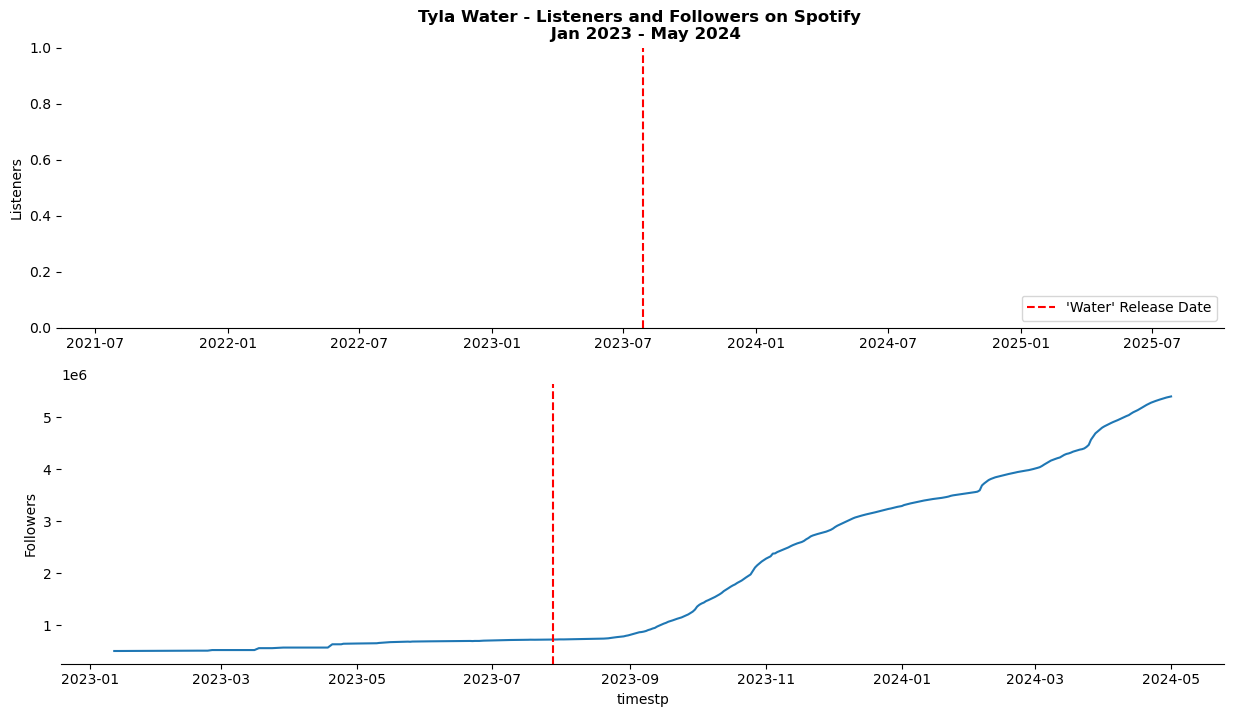

In [38]:
fig, axs = plt.subplots(2,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.lineplot(x='timestp',y='value',data=df.loc[df['Metric'] == 'listeners'], ax=axs[0])
sns.lineplot(x='timestp',y='value',data=df.loc[df['Metric'] == 'followers'], ax=axs[1])

axs[0].set_title('Tyla Water - Listeners and Followers on Spotify \n Jan 2023 - May 2024', fontweight='bold')
axs[0].set_ylabel('Listeners')
axs[0].axvline(x=pd.Timestamp(2023,7,28), color='red',linestyle='--', label="'Water' Release Date")
axs[0].legend(loc='lower right')

axs[1].set_ylabel('Followers')
axs[1].axvline(x=pd.Timestamp(2023,7,28), color='red',linestyle='--')


plt.show()

## Fan Metrics - Instagram

In [16]:
#Example URL: https://api.chartmetric.com/api/artist/:id/stat/:source

source = 'instagram'
artist_url = f"https://api.chartmetric.com/api/artist/{artist_id}/stat/{source}?since=2023-01-01&until=2024-05-01"

headers = {"Authorization": f"Bearer {api_token}"}

artist_results = requests.get(artist_url, headers = headers)

In [17]:
artist_results

<Response [200]>

In [18]:
fan_metrics_response_keys = ['followers']

In [19]:
for f in fan_metrics_response_keys:
    print(f)
    if fan_metrics_response_keys.index(f) == 0:
        df = pd.json_normalize(artist_results.json()['obj'][f])
        df['Metric'] = f
    else:
        df = pd.concat([df,pd.json_normalize(artist_results.json()['obj'][f])])
        df.loc[df['Metric'].isnull(),'Metric'] = f

followers


#### Look at stuff in the df

In [20]:
df.head()

,weekly_diff,weekly_diff_percent,monthly_diff,monthly_diff_percent,value,timestp,diff,Metric
0,297482,5.0317,1019509,19.6432,507351,2023-01-12T00:00:00.000Z,NaN,followers
1,297482,5.0317,1019509,19.6432,507351,2023-01-13T00:00:00.000Z,0.0,followers
2,297482,5.0317,1019509,19.6432,507351,2023-01-14T00:00:00.000Z,0.0,followers
3,297482,5.0317,1019509,19.6432,510205,2023-01-26T00:00:00.000Z,2854.0,followers
4,297482,5.0317,1019509,19.6432,510205,2023-01-27T00:00:00.000Z,0.0,followers


In [21]:
df.shape

(438, 8)

In [22]:
df.dtypes

weekly_diff               int64
weekly_diff_percent     float64
monthly_diff              int64
monthly_diff_percent    float64
value                     int64
timestp                  object
diff                    float64
Metric                   object
dtype: object

In [23]:
df['timestp'] = pd.to_datetime(df['timestp'])

In [24]:
df.dtypes

weekly_diff                           int64
weekly_diff_percent                 float64
monthly_diff                          int64
monthly_diff_percent                float64
value                                 int64
timestp                 datetime64[ns, UTC]
diff                                float64
Metric                               object
dtype: object

### Visual

c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


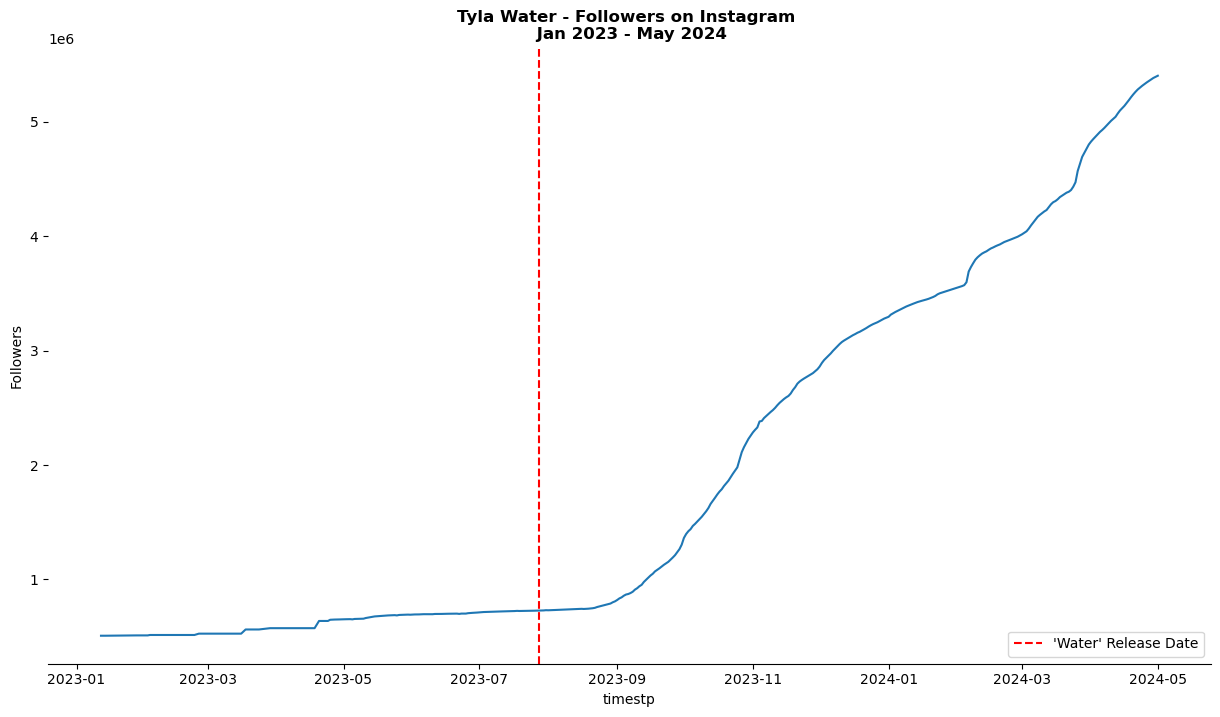

In [25]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.lineplot(x='timestp',y='value',data=df)

ax.axvline(x=pd.Timestamp(2023,7,28), color='red',linestyle='--', label="'Water' Release Date")
ax.legend(loc='lower right')

plt.ylabel('Followers')

plt.title('Tyla Water - Followers on Instagram \n Jan 2023 - May 2024', fontweight='bold')
plt.show()

## Career History

In [26]:
#Example URL: https://api.chartmetric.com/api/artist/:id/career

artist_url = f"https://api.chartmetric.com/api/artist/{artist_id}/career?since=2023-01-01&limit=1000"

headers = {"Authorization": f"Bearer {api_token}"}

artist_results = requests.get(artist_url, headers = headers)

In [27]:
artist_results

<Response [200]>

In [28]:
df_career_history = pd.json_normalize(artist_results.json()['obj'])
df_career_history

,timestp,stage,stage_score,momentum,momentum_score
0,2024-05-15,superstar,18,growth,65
1,2024-05-12,superstar,18,growth,67
2,2024-05-08,superstar,18,growth,69
3,2024-05-05,superstar,17,growth,72
4,2024-05-01,superstar,17,growth,74
...,...,...,...,...,...
94,2023-05-24,developing,97,growth,76
95,2023-05-21,developing,96,growth,73
96,2023-05-17,developing,93,growth,68
97,2023-05-14,developing,92,growth,64


In [29]:
df_career_history['timestp'] = pd.to_datetime(df_career_history['timestp'])

In [30]:
df_career_history.dtypes

timestp           datetime64[ns]
stage                     object
stage_score                int64
momentum                  object
momentum_score             int64
dtype: object

c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

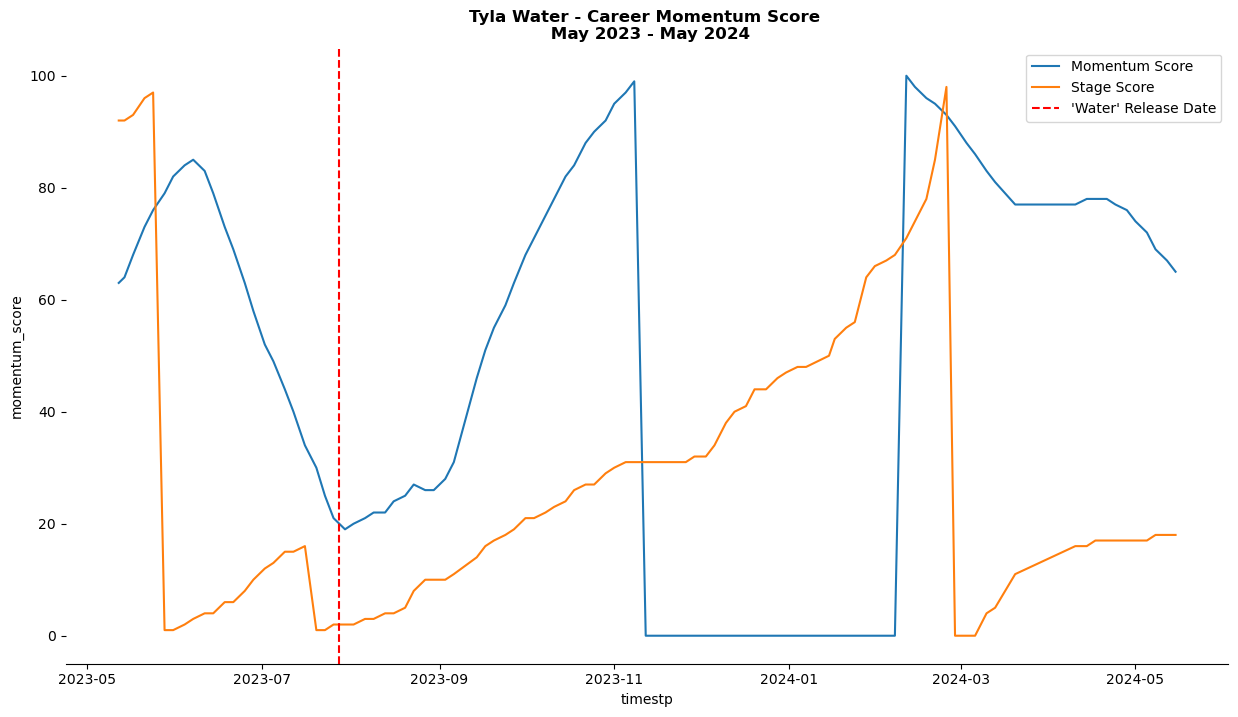

In [31]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.lineplot(x='timestp',y='momentum_score',data=df_career_history, label='Momentum Score')
sns.lineplot(x='timestp',y='stage_score',data=df_career_history, label='Stage Score')

ax.axvline(x=pd.Timestamp(2023,7,28), color='red',linestyle='--', label="'Water' Release Date")

plt.legend()
plt.title('Tyla Water - Career Momentum Score \n May 2023 - May 2024', fontweight='bold')
plt.show()

## CPP

In [32]:
#Example URL: https://api.chartmetric.com/api/artist/:id/cpp

artist_url = f"https://api.chartmetric.com/api/artist/{artist_id}/cpp?stat=rank&since=2023-01-01"

headers = {"Authorization": f"Bearer {api_token}"}

artist_results = requests.get(artist_url, headers = headers)

In [33]:
artist_results

<Response [200]>

In [34]:
df_cpp = pd.json_normalize(artist_results.json()['obj'])
df_cpp

,rank,timestp
0,22830,2023-01-01
1,23506,2023-01-02
2,21190,2023-01-03
3,18046,2023-01-04
4,17825,2023-01-05
...,...,...
493,151,2024-05-12
494,148,2024-05-13
495,165,2024-05-14
496,156,2024-05-15


In [35]:
df_cpp['timestp'] = pd.to_datetime(df_cpp['timestp'])

In [36]:
df_cpp.dtypes

rank                int64
timestp    datetime64[ns]
dtype: object

c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\eztim\anaconda3\envs\ai_dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


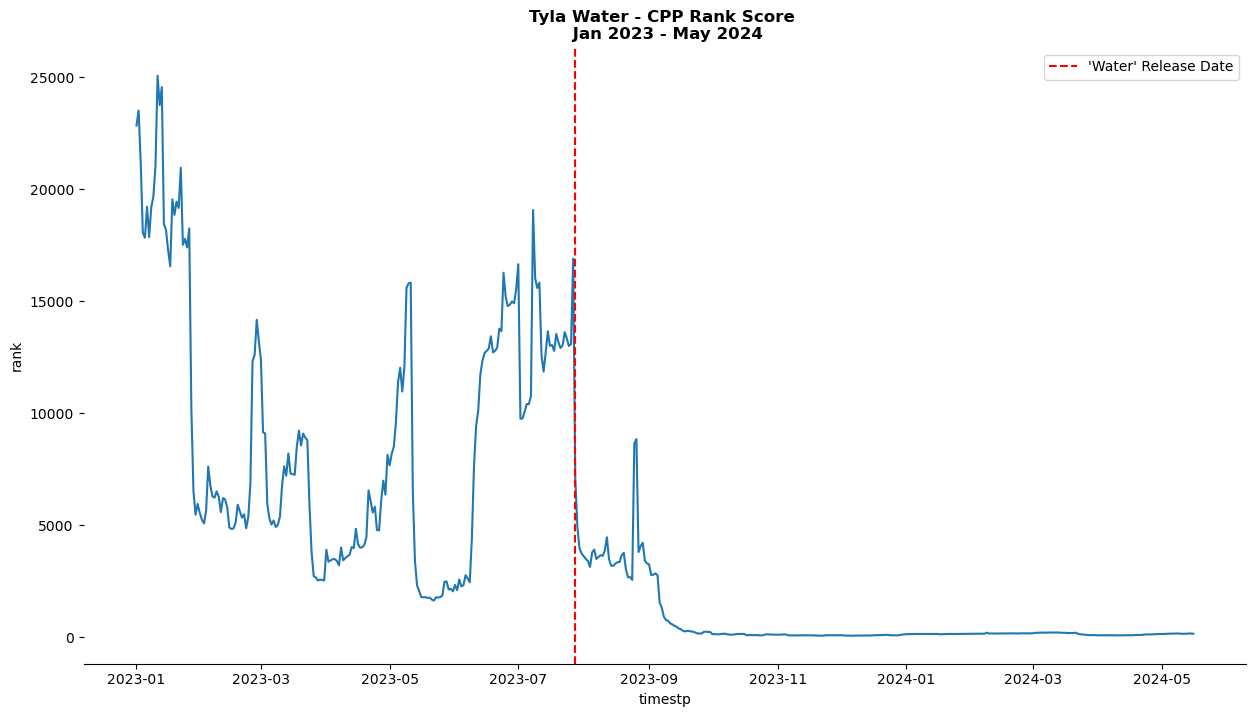

In [37]:
fig, ax = plt.subplots(1,1, figsize=(15,8))

sns.despine(left=True,right=True,top=True)

sns.lineplot(x='timestp',y='rank',data=df_cpp)

ax.axvline(x=pd.Timestamp(2023,7,28), color='red',linestyle='--', label="'Water' Release Date")

plt.legend()
plt.title('Tyla Water - CPP Rank Score \n Jan 2023 - May 2024', fontweight='bold')
plt.show()